# Human-Chimpanzee: Differencially Expressed? 
Submitted by: Lihi Erez (206561847) & Matanya Wiener (207865031)


In this analysis, we used data from our lab (David Gokhman's lab) at the Weizmann Institute. Our lab primarily focuses on researching human evolution and addressing questions about what makes us uniquely human.

Since chimpanzees are our closest living relatives, sharing 98.8% of our genome, investigating the differences between humans and chimps can shed light on many open questions. Because most genes are identical (or nearly identical) between the two species, the most significant differences lie in gene regulation and gene expression levels. These differences drive phenotypic variations such as skeletal structure, brain development, immune system function, and many other traits.

One of the most powerful tools in our lab is the creation of human-chimpanzee hybrid cells. These cells are tetraploid, meaning they contain a full diploid copy of both the human and chimpanzee genomes—resulting in four copies of each chromosome. This system allows us to study differential gene expression while controlling for external variables such as batch effects, environmental influences, cell differentiation, and trans-regulatory elements. Once the cells become hybrids, all external factors affecting gene expression influence both the human and chimp genes equally.

However, this method is limited to genes that have at least one nucleotide difference between the human and chimp genomes. Since the approach relies on RNA sequencing, such sequence differences are necessary to distinguish the origin of each transcript.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
HUMAN_COLOR = 'royalblue'
CHIMP_COLOR = 'darkorange'
HYBRID_COLOR = 'forestgreen'

## Reading df

### Orgenize Relevant Columns 

In [68]:
# This is to give more intuitive column names to the dataframes
def rename_columns(df, col:int):
    cell_name = col - ((col-2) % 4)
    df.iloc[1,col] = df.iloc[0,cell_name] + '_' + df.iloc[1,col]
    return cell_name

In [69]:
GENE_AXIS = 0
SAMPLE_AXIS = 1

# Reading the data
raw_df = pd.read_csv('ASE-HYBRID.csv', header=None, skiprows=[1,2] )

# Removing first 16 columns
raw_df = raw_df.iloc[:,16:-1]

samples = raw_df.iloc[0].dropna().values

# Renaming the columns
for i in range(2,raw_df.shape[1]):
    rename_columns(raw_df, i)

# Turning the changed row into the new header
raw_df.columns = raw_df.iloc[1,:]

# Removing the first two rows
raw_df = raw_df.drop([0,1])
cols_to_drop = [col for col in raw_df.columns if 'ambig' in col] + ['chrom']
raw_df = raw_df.drop(columns=cols_to_drop)
raw_df.index = raw_df['gene']
raw_df = raw_df[np.logical_not(raw_df.index.duplicated(keep="first"))]  # Keep only the first occurrence

raw_df = raw_df.drop(columns=['gene'])

# The simplified df is without the non-esential columns
simplified_df = raw_df.astype(float)
simplified_df

C:\Users\wmata\AppData\Local\Temp\ipykernel_16272\1943210423.py:5: DtypeWarning: Columns (0,1,8,9,10,11,12,13,14,15,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv('ASE-HYBRID.csv', header=None, skiprows=[1,2] )


1,HL1-25_1_ref_counts,HL1-25_1_alt_counts,HL1-25_1_no_ase_counts,HL1-25_2_ref_counts,HL1-25_2_alt_counts,HL1-25_2_no_ase_counts,HL1-29_1_ref_counts,HL1-29_1_alt_counts,HL1-29_1_no_ase_counts,HL1-29_2_ref_counts,...,CNCC_H20961_3_no_ase_counts,CNCC_C3649_1_ref_counts,CNCC_C3649_1_alt_counts,CNCC_C3649_1_no_ase_counts,CNCC_C3649_2_ref_counts,CNCC_C3649_2_alt_counts,CNCC_C3649_2_no_ase_counts,CNCC_C3649_3_ref_counts,CNCC_C3649_3_alt_counts,CNCC_C3649_3_no_ase_counts
gene,,,,,,,,,,,,,,,,,,,,,
3.8-1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.8-1.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.8-1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5-HT3C2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1BG,39.0,70.0,59.0,65.0,92.0,104.0,50.0,79.0,75.0,58.0,...,98.0,0.0,111.0,60.0,0.0,177.0,80.0,0.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11B,450.0,753.0,888.0,535.0,980.0,1058.0,418.0,713.0,831.0,462.0,...,1112.0,0.0,338.0,464.0,0.0,691.0,867.0,1.0,1215.0,1039.0
ZYX,3917.0,4570.0,1618.0,6926.0,8019.0,3712.0,3901.0,4161.0,1727.0,5462.0,...,1300.0,4.0,1254.0,464.0,6.0,2344.0,704.0,4.0,250.0,124.0
ZZEF1,552.0,423.0,617.0,703.0,549.0,818.0,456.0,403.0,505.0,681.0,...,984.0,2.0,638.0,584.0,2.0,1066.0,989.0,2.0,941.0,730.0


## Parse the Sample Types

There are several types of cells and samples, which split into overlapping categories:  

### **Sample Types**  
- **Hybrid Cells**  
- **Human Cells**  
- **Chimp Cells**  

### **Cell Type**  
- *iPSC* (*induced Pluripotent Stem Cells*)  
- *CNCC* (*Cranial Neural Crest Cells*)  

### **mRNA Read Type** (Referred to as **COUNTS**)  
- **Reference Counts** – mRNA reads of *Human Gene*  
- **Alternative Counts** – mRNA reads of *Chimp Gene*  

### **Dataset Structure**  
$
\text{Dataset} = \text{Sample Types} \times \text{Cell Types} \times \text{Read Types}
$

Thus, there are samples such as:  
- **Human-iPSC-Ref**  
- **Hybrid-CNCC-Alt**  
- **Hybrid-iPSC-Alt**  
- ...and all other possible combinations.


In [70]:
# Making a list of the categories of samples for easy access later
HYBRIDS_SAMPLES = set([s for s in simplified_df.columns if 'HL' in s])
non_hybrid = set(simplified_df.columns) - HYBRIDS_SAMPLES
HUMAN_SAMPLES = set([s for s in non_hybrid if 'H' in s])
CHIMP_SAMPLES = non_hybrid - HUMAN_SAMPLES
REF_COUNT = set([s for s in simplified_df.columns if 'ref' in s])
ALT_COUNT = set([s for s in simplified_df.columns if 'alt' in s])
NO_ASE_COUNT = set([s for s in simplified_df.columns if 'no_ase' in s])
CNCC = set([s for s in simplified_df.columns if 'CNCC' in s])
IPSC = set(simplified_df.columns) - CNCC

SAMPLES = {}
for s in samples:
    SAMPLES[s] = []


def intersect(list_of_categories):
    """This function takes a list of categories and returns the intersection of the samples that belong to those categories
    Will be used to specify the columns in the DF which we want to work with"""
    return sorted(list(set.intersection(*list_of_categories)))





### Cleaning the DF from meaningless genes 

In [71]:
print("Shape before filtering:", simplified_df.shape)

# Filtering the data - removing redundant genes
# human_chimp_gene_expression_columns = REF_COUNT.union(ALT_COUNT)
clean_df = simplified_df[simplified_df.loc[:,list(REF_COUNT.union(ALT_COUNT))].gt(5).any(axis=1)]
print("Shape after filtering:", clean_df.shape)
clean_df


Shape before filtering: (45946, 93)
Shape after filtering: (21770, 93)


1,HL1-25_1_ref_counts,HL1-25_1_alt_counts,HL1-25_1_no_ase_counts,HL1-25_2_ref_counts,HL1-25_2_alt_counts,HL1-25_2_no_ase_counts,HL1-29_1_ref_counts,HL1-29_1_alt_counts,HL1-29_1_no_ase_counts,HL1-29_2_ref_counts,...,CNCC_H20961_3_no_ase_counts,CNCC_C3649_1_ref_counts,CNCC_C3649_1_alt_counts,CNCC_C3649_1_no_ase_counts,CNCC_C3649_2_ref_counts,CNCC_C3649_2_alt_counts,CNCC_C3649_2_no_ase_counts,CNCC_C3649_3_ref_counts,CNCC_C3649_3_alt_counts,CNCC_C3649_3_no_ase_counts
gene,,,,,,,,,,,,,,,,,,,,,
A1BG,39.0,70.0,59.0,65.0,92.0,104.0,50.0,79.0,75.0,58.0,...,98.0,0.0,111.0,60.0,0.0,177.0,80.0,0.0,1.0,4.0
A1BG-AS1,40.0,49.0,8.0,68.0,66.0,11.0,46.0,49.0,8.0,33.0,...,10.0,0.0,38.0,4.0,0.0,53.0,7.0,0.0,59.0,1.0
A2M,1.0,13.0,6.0,21.0,40.0,51.0,3.0,11.0,11.0,4.0,...,3642.0,6.0,143.0,154.0,6.0,243.0,220.0,5.0,5.0,8.0
A2M-AS1,8.0,19.0,23.0,1.0,13.0,22.0,5.0,12.0,36.0,3.0,...,1.0,0.0,1.0,3.0,0.0,7.0,3.0,0.0,0.0,0.0
A2ML1,129.0,50.0,57.0,101.0,33.0,62.0,178.0,37.0,94.0,106.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,20.0,51.0,31.0,28.0,87.0,48.0,27.0,69.0,44.0,26.0,...,1.0,0.0,8.0,3.0,0.0,17.0,9.0,0.0,84.0,30.0
ZYG11B,450.0,753.0,888.0,535.0,980.0,1058.0,418.0,713.0,831.0,462.0,...,1112.0,0.0,338.0,464.0,0.0,691.0,867.0,1.0,1215.0,1039.0
ZYX,3917.0,4570.0,1618.0,6926.0,8019.0,3712.0,3901.0,4161.0,1727.0,5462.0,...,1300.0,4.0,1254.0,464.0,6.0,2344.0,704.0,4.0,250.0,124.0


### Normalize Into Counts per Million

In [72]:
# Normalizing the counts to TPM - Transcripts Per Million
normalized_df = pd.DataFrame(index=clean_df.index)

COLUMNS_PER_SAMPLE = 3
for i in range(0, clean_df.shape[1], COLUMNS_PER_SAMPLE):
    sample_window = clean_df.iloc[:, i:i + COLUMNS_PER_SAMPLE]
    total_sample_counts = sample_window.sum()
    normalized_df[sample_window.columns] = (1e6 * sample_window / total_sample_counts).astype(float)

normalized_df

,HL1-25_1_ref_counts,HL1-25_1_alt_counts,HL1-25_1_no_ase_counts,HL1-25_2_ref_counts,HL1-25_2_alt_counts,HL1-25_2_no_ase_counts,HL1-29_1_ref_counts,HL1-29_1_alt_counts,HL1-29_1_no_ase_counts,HL1-29_2_ref_counts,...,CNCC_H20961_3_no_ase_counts,CNCC_C3649_1_ref_counts,CNCC_C3649_1_alt_counts,CNCC_C3649_1_no_ase_counts,CNCC_C3649_2_ref_counts,CNCC_C3649_2_alt_counts,CNCC_C3649_2_no_ase_counts,CNCC_C3649_3_ref_counts,CNCC_C3649_3_alt_counts,CNCC_C3649_3_no_ase_counts
gene,,,,,,,,,,,,,,,,,,,,,
A1BG,4.260238,7.342179,3.458820,5.454825,7.414115,4.177873,5.767381,8.953788,4.374306,5.619700,...,5.713198,0.000000,16.683197,7.323378,0.000000,14.641796,5.771966,0.000000,0.095638,0.350509
A1BG-AS1,4.369475,5.139526,0.468993,5.706586,5.318821,0.441890,5.305991,5.553616,0.466593,3.197415,...,0.582979,0.000000,5.711365,0.488225,0.000000,4.384267,0.505047,0.000000,5.642645,0.087627
A2M,0.109237,1.363548,0.351744,1.762328,3.223528,2.048765,0.346043,1.246730,0.641565,0.387566,...,212.321095,399.920016,21.492767,18.796671,409.165303,20.101449,15.872906,299.778164,0.478190,0.701019
A2M-AS1,0.873895,1.992877,1.348353,0.083920,1.047647,0.883781,0.576738,1.360069,2.099667,0.290674,...,0.058298,0.000000,0.150299,0.366169,0.000000,0.579054,0.216449,0.000000,0.000000,0.000000
A2ML1,14.091557,5.244414,3.341572,8.475959,2.659411,2.490655,20.531877,4.193546,5.482464,10.270486,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.095638,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,2.184737,5.349302,1.817346,2.349771,7.011174,1.928249,3.114386,7.820397,2.566260,2.519176,...,0.058298,0.000000,1.202393,0.366169,0.000000,1.406274,0.649346,0.000000,8.033596,2.628821
ZYG11B,49.156593,78.980872,52.058168,44.897406,78.976440,42.501823,48.215307,80.810773,48.467313,44.763816,...,64.827308,0.000000,50.801087,56.634126,0.000000,57.160909,62.553679,59.955633,116.200224,91.044818
ZYX,427.880833,479.339422,94.853734,581.232582,646.236805,149.117926,449.971082,471.603967,100.725692,529.220695,...,75.787321,266.613344,188.475037,56.634126,409.165303,193.900393,50.793299,239.822531,23.909511,10.865792


### Show that Hybrid Gene Expression is Similar to the Parental Gene Expression

First, we will need to assure that the hybrid cells' gene expression is similar to te parental gene expression.
It was an initial fear of us that the TF and other gene regulatory factors of the Human Genome and the Chimp genom will interfere with eachother inside the hybrid cells, but after checking the data and speaking to the scientists that produced the data we felt sure to continue the analysis.
Here we visualize this point. In the graph we can see that the gene expression of the hybrid cells is very highly correlated.  

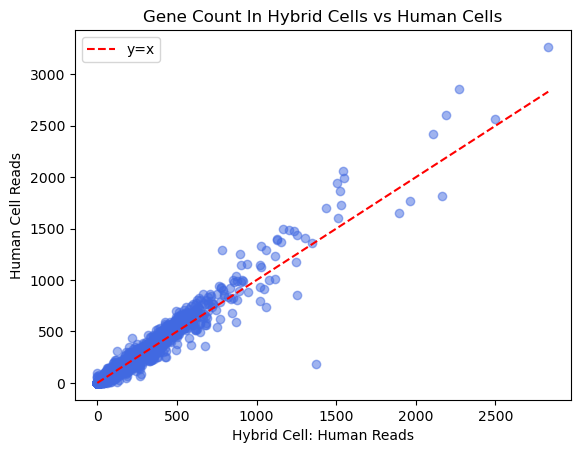

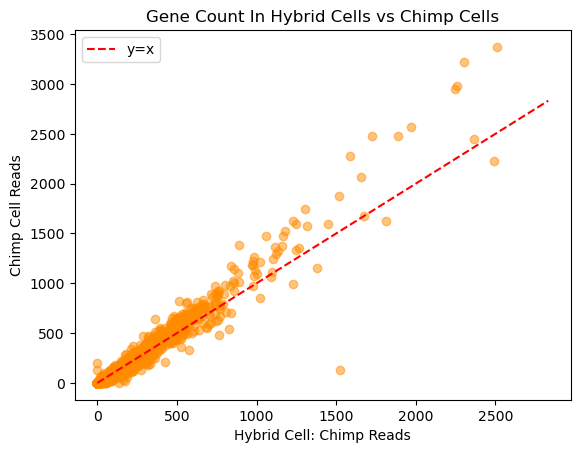

In [73]:
df_compare_hybrid_vs_parental_scatter = pd.DataFrame(index=normalized_df.index)
df_compare_hybrid_vs_parental_scatter.loc[:, 'hybrid_ref_avg'] = (normalized_df.loc[:, intersect([IPSC, HYBRIDS_SAMPLES, REF_COUNT])].mean(axis=1))
df_compare_hybrid_vs_parental_scatter.loc[:, 'hybrid_alt_avg'] = (normalized_df.loc[:, intersect([IPSC, HYBRIDS_SAMPLES, ALT_COUNT])].mean(axis=1))
df_compare_hybrid_vs_parental_scatter.loc[:, 'parental_ref_avg'] = (normalized_df.loc[:, intersect([IPSC, HUMAN_SAMPLES, REF_COUNT])].mean(axis=1))
df_compare_hybrid_vs_parental_scatter.loc[:, 'parental_alt_avg'] = (normalized_df.loc[:, intersect([IPSC, CHIMP_SAMPLES, ALT_COUNT])].mean(axis=1))

plt.scatter(df_compare_hybrid_vs_parental_scatter['hybrid_ref_avg'], df_compare_hybrid_vs_parental_scatter['parental_ref_avg'], color=HUMAN_COLOR, alpha=0.5)
plt.title('Gene Count In Hybrid Cells vs Human Cells')
plt.xlabel('Hybrid Cell: Human Reads')
plt.ylabel('Human Cell Reads')
# Add y=x line
plt.plot([df_compare_hybrid_vs_parental_scatter['hybrid_ref_avg'].min(), df_compare_hybrid_vs_parental_scatter['hybrid_ref_avg'].max()],
         [df_compare_hybrid_vs_parental_scatter['hybrid_ref_avg'].min(), df_compare_hybrid_vs_parental_scatter['hybrid_ref_avg'].max()],
         color='red', linestyle='--', label='y=x')
plt.legend()
plt.show() 


plt.scatter(df_compare_hybrid_vs_parental_scatter['hybrid_alt_avg'], df_compare_hybrid_vs_parental_scatter['parental_alt_avg'], color=CHIMP_COLOR, alpha=0.5)
plt.title('Gene Count In Hybrid Cells vs Chimp Cells')
plt.xlabel('Hybrid Cell: Chimp Reads')
plt.ylabel('Chimp Cell Reads')
# Add y=x line
plt.plot([df_compare_hybrid_vs_parental_scatter['hybrid_ref_avg'].min(), df_compare_hybrid_vs_parental_scatter['hybrid_ref_avg'].max()],
         [df_compare_hybrid_vs_parental_scatter['hybrid_ref_avg'].min(), df_compare_hybrid_vs_parental_scatter['hybrid_ref_avg'].max()],
         color='red', linestyle='--', label='y=x')
plt.legend()
plt.show()


## **Find Genes with Similar Distribution in Both Hybrid and Parental Samples**  

### **Motivation:**  

Out of the large number of genes in our dataset, we aim to identify genes that exhibit a similar expression distribution in the parental human and chimp cells.  

We applied two different methods to determine which genes are expressed similarly between the **Hybrid Cells** and **Parental Cells**.  

### **1. Wilcoxon Test**  
We used the traditional **Wilcoxon test**, where:  

- The **null hypothesis** (*H₀*) states that gene expression levels in **Hybrid-Human** and **Hybrid-Chimp** cells follow the same distribution.  
- The **alternative hypothesis** (*H₁*) posits that they come from different distributions.  

In this case, we sought **high p-values**, which would indicate strong evidence that the gene expression distributions are the same.  

### **2. TOST Test**  
The **Two One-Sided Tests (TOST) method** is an equivalence test that performs **two one-sided Wilcoxon tests** to determine whether two groups are equivalent within a predefined acceptable margin (**ε**).  

This was ultimately the method we chose to use.  



In [74]:
from scipy.stats import mannwhitneyu

def get_p_values_paired_wilcoxon(gene):
    human_h_values = normalized_df.loc[gene, intersect([HUMAN_SAMPLES, REF_COUNT, IPSC])]
    hybrid_h_vlaues = normalized_df.loc[gene, intersect([HYBRIDS_SAMPLES, REF_COUNT, IPSC])]
    hybrid_c_values = normalized_df.loc[gene, intersect([HYBRIDS_SAMPLES, ALT_COUNT, IPSC])]
    chimp_c_values = normalized_df.loc[gene, intersect([CHIMP_SAMPLES, ALT_COUNT, IPSC])]
    
    _, p_val_wilcoxon_hybrid_human = mannwhitneyu(human_h_values, hybrid_h_vlaues, alternative='two-sided')
    _, p_val_wilcoxon_hybrid_chimp = mannwhitneyu(hybrid_c_values, chimp_c_values, alternative='two-sided')
    return{ 
            'p_val_wilcoxon_hybrid_human': p_val_wilcoxon_hybrid_human,
            'p_val_wilcoxon_hybrid_chimp': p_val_wilcoxon_hybrid_chimp,
            }


p_values_DE = pd.DataFrame(index=normalized_df.index, columns=['p_val_wilcoxon_hybrid_human', 'p_val_wilcoxon_hybrid_chimp'])
for gene in normalized_df.index: 
    p_values_DE.loc[gene] = get_p_values_paired_wilcoxon(gene)


Process how many genes are equvalent in Hybrid-Parental...

In [75]:
p_val_threshold = 0.5

print('---------------------------------')
print('\tWilcoxon test results')
print("Hybrid && Human Genes:\t", (p_values_DE.loc[:,'p_val_wilcoxon_hybrid_human'] > p_val_threshold).sum())
print("Hybrid && Chimp Genes:\t", (p_values_DE.loc[:,'p_val_wilcoxon_hybrid_chimp'] > p_val_threshold).sum())
high_p_values_wilcoxon = np.logical_and(p_values_DE.loc[:, 'p_val_wilcoxon_hybrid_human'] > p_val_threshold, p_values_DE.loc[:, 'p_val_wilcoxon_hybrid_chimp'] > p_val_threshold)
print("Both:\t\t\t", high_p_values_wilcoxon.sum())
print('---------------------------------')

wilcoxon_equivalent_genes = normalized_df.index[high_p_values_wilcoxon]
expressed_in_ISPC_genes = normalized_df.loc[wilcoxon_equivalent_genes, intersect([IPSC, HYBRIDS_SAMPLES, REF_COUNT])].sum(axis=1) > 0
wilcoxon_equivalent_genes = wilcoxon_equivalent_genes[expressed_in_ISPC_genes]

---------------------------------
	Wilcoxon test results
Hybrid && Human Genes:	 7282
Hybrid && Chimp Genes:	 7307
Both:			 2876
---------------------------------


### TOST - Two One-Sided Test - Trying to find genes with consistant distribution 
The TOST test is to show that two groups belong to the same distribution. In this case we are trying to identify genes that the Hybrid cells are distributing similarly to the parental cells. 



In [76]:
def tost_test(gene, epsilon):
    human_h_values = normalized_df.loc[gene, intersect([HUMAN_SAMPLES, REF_COUNT, IPSC])]
    hybrid_h_values = normalized_df.loc[gene, intersect([HYBRIDS_SAMPLES, REF_COUNT, IPSC])]
    hybrid_c_values = normalized_df.loc[gene, intersect([HYBRIDS_SAMPLES, ALT_COUNT, IPSC])]
    chimp_c_values = normalized_df.loc[gene, intersect([CHIMP_SAMPLES, ALT_COUNT, IPSC])]

    _, lower_bound_p_val_hybrid_human = mannwhitneyu(human_h_values, hybrid_h_values - epsilon, alternative='greater')
    _, upper_bound_p_val_hybrid_human = mannwhitneyu(human_h_values, hybrid_h_values + epsilon, alternative='less')
    _, lower_bound_p_val_hybrid_chimp = mannwhitneyu(hybrid_c_values, chimp_c_values - epsilon, alternative='greater')
    _, upper_bound_p_val_hybrid_chimp = mannwhitneyu(hybrid_c_values, chimp_c_values + epsilon, alternative='less')

    return {
        'lower_bound_p_val_hybrid_human': lower_bound_p_val_hybrid_human,
        'upper_bound_p_val_hybrid_human': upper_bound_p_val_hybrid_human,
        'lower_bound_p_val_hybrid_chimp': lower_bound_p_val_hybrid_chimp,
        'upper_bound_p_val_hybrid_chimp': upper_bound_p_val_hybrid_chimp,
    }

tost_p_values = pd.DataFrame(index=wilcoxon_equivalent_genes, columns=['lower_bound_p_val_hybrid_human', 
                                                                    'upper_bound_p_val_hybrid_human', 
                                                                    'lower_bound_p_val_hybrid_chimp',
                                                                    'upper_bound_p_val_hybrid_chimp'
                                                                    ])
for gene in normalized_df.index: 
    tost_p_values.loc[gene] = tost_test(gene, epsilon=0.8)


C:\Users\wmata\AppData\Local\Temp\ipykernel_16272\1993030495.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tost_p_values.loc[gene] = tost_test(gene, epsilon=0.8)


In [77]:
human_hybrid_tost_equivalence = np.maximum(tost_p_values['lower_bound_p_val_hybrid_human'], tost_p_values['upper_bound_p_val_hybrid_human']) < 0.05
chimp_hybrid_tost_equivalence = np.maximum(tost_p_values['lower_bound_p_val_hybrid_chimp'], tost_p_values['upper_bound_p_val_hybrid_chimp']) < 0.05

print('---------------------------------')
print('\tTOST test results')
print("Hybrid && Human Genes:\t", human_hybrid_tost_equivalence.sum())
print("Hybrid && Chimp Genes:\t", chimp_hybrid_tost_equivalence.sum())
selected_tost_equivalent_genes = normalized_df.index[np.logical_and(human_hybrid_tost_equivalence, chimp_hybrid_tost_equivalence)]
print('Both:\t\t\t', selected_tost_equivalent_genes.shape[0])
print('---------------------------------')


---------------------------------
	TOST test results
Hybrid && Human Genes:	 6443
Hybrid && Chimp Genes:	 6506
Both:			 5603
---------------------------------


The TOST method gave us more genes to work with, and since the hybrid-cell gene epxression is originally very correlated with the parental gene expression we will pick the 4800 most correlated with parental gene expression genes. 

### Compare Hybrid Expression to Parental Expression
Here we expect to see that the same gene is distributed similarely in the parental and the Hybrid

C:\Users\wmata\AppData\Local\Temp\ipykernel_16272\3449494003.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_plot[df_plot['Gene'] == gene], x='Sample Type', y='Expression', ax=ax,
C:\Users\wmata\AppData\Local\Temp\ipykernel_16272\3449494003.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_plot[df_plot['Gene'] == gene], x='Sample Type', y='Expression', ax=ax,
C:\Users\wmata\AppData\Local\Temp\ipykernel_16272\3449494003.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_plot[df_plot['Gene'] == gene],

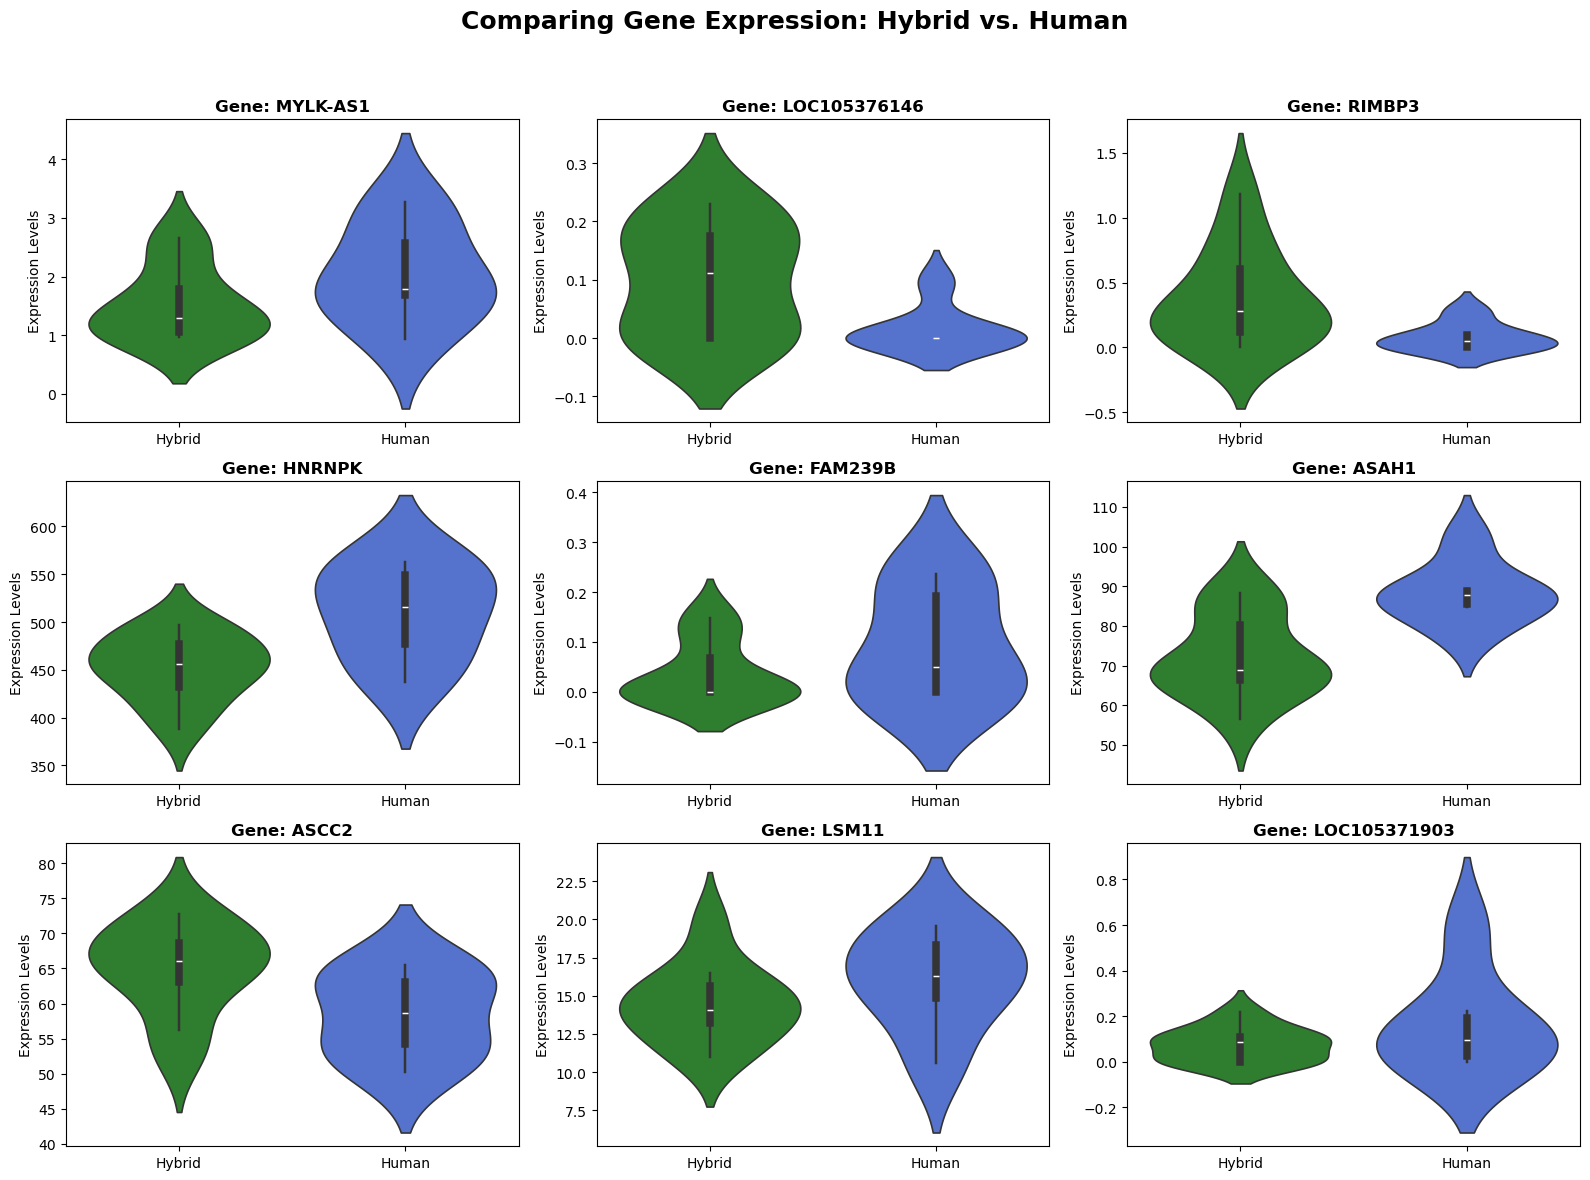

In [78]:
np.random.seed(1999)

SAMPLE_AMOUNT = 9
selected_genes = np.random.choice(selected_tost_equivalent_genes, min(SAMPLE_AMOUNT, len(selected_tost_equivalent_genes)), replace=False)

# Define colors
hybrid_h = HYBRID_COLOR
parental_h = HUMAN_COLOR

# Prepare data for visualization
plot_data = []
for gene in selected_genes:
    df_hybrid_h_ipsc = normalized_df.loc[gene, intersect([IPSC, HYBRIDS_SAMPLES, REF_COUNT])]
    df_human_h_ipsc = normalized_df.loc[gene, intersect([IPSC, HUMAN_SAMPLES, REF_COUNT])]

    for val in df_hybrid_h_ipsc:
        plot_data.append({'Gene': gene, 'Expression': val, 'Sample Type': 'Hybrid'})
    for val in df_human_h_ipsc:
        plot_data.append({'Gene': gene, 'Expression': val, 'Sample Type': 'Human'})

df_plot = pd.DataFrame(plot_data)

# Create figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
fig.suptitle('Comparing Gene Expression: Hybrid vs. Human', fontsize=18, fontweight='bold')
axes = axes.flatten()

# Plot boxplot & violin plot for each gene
for i, gene in enumerate(selected_genes):
    ax = axes[i]
    
    sns.violinplot(data=df_plot[df_plot['Gene'] == gene], x='Sample Type', y='Expression', ax=ax, 
                   palette=[hybrid_h, parental_h], inner="box", linewidth=1.2)

    # sns.boxplot(data=df_plot[df_plot['Gene'] == gene], x='Sample Type', y='Expression', ax=ax,
    #         palette=[hybrid_h, parental_h], linewidth=1.2)

    
    ax.set_title(f'Gene: {gene}', fontsize=12, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Expression Levels')

# Hide empty subplots if fewer than 9 genes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
fig.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()


### Comparing Human-Chimp Gene Expression in Hybrid Cells 

To compare the gene expression distribution between Human Genome and Chimp Genome, we will use paired wolcoxon test. The pairs are within every hybrid cell for each gene. 

In [79]:
from scipy.stats import wilcoxon

def get_p_values_paired_wilcoxon(group1_2_gap, group1_greater_name, group2_greater_name):
    """This is a helper function to calculate the p-values for the Wilcoxon test for the given groups. This is used to determine the DE genes."""
    _, p_wilcoxon_group1_overexpressed = wilcoxon(group1_2_gap, alternative='greater')
    _, p_wilcoxon_group1_underexpressed = wilcoxon(group1_2_gap, alternative='less')
    if(p_wilcoxon_group1_overexpressed is np.nan or p_wilcoxon_group1_underexpressed is np.nan): 
        print(f"{gene} showed NAN")
    return{
            group1_greater_name: p_wilcoxon_group1_overexpressed,
            group2_greater_name: p_wilcoxon_group1_underexpressed
            }



Looking for DE genes between Human and Chimp, first we will create the p_values.

In [80]:
zero_genes = [] 
for gene in selected_tost_equivalent_genes:
    refs_avg = normalized_df.loc[gene, intersect([REF_COUNT, IPSC, HYBRIDS_SAMPLES])].mean()
    alts_avg = normalized_df.loc[gene, intersect([ALT_COUNT, IPSC, HYBRIDS_SAMPLES])].mean()
    if refs_avg == 0 or alts_avg == 0:
        zero_genes.append(gene)
        # print(f"Gene {gene} has 0 in either ref or alt")
        continue

selected_genes = selected_tost_equivalent_genes[~selected_tost_equivalent_genes.isin(zero_genes)]


Now we will select genes that have a p-value lower than 0.05, meaning they are differentially expressed (with an FDR=0.05 correction)

In [81]:
import statsmodels.stats.multitest as mt

p_values_ref_alt_comparison_in_hybrid = pd.DataFrame(index=selected_genes, columns=['p_wilcoxon_human_overexpressed', 'p_wilcoxon_human_underexpressed'])
for gene in selected_genes: 
    
    refs_gene = normalized_df.loc[gene, intersect([REF_COUNT, IPSC, HYBRIDS_SAMPLES])]
    alts_gene = normalized_df.loc[gene, intersect([ALT_COUNT, IPSC, HYBRIDS_SAMPLES])]
    refs_gene_gap = refs_gene.values - alts_gene.values
    p_values_ref_alt_comparison_in_hybrid.loc[gene] = get_p_values_paired_wilcoxon(group1_2_gap=refs_gene_gap, 
                                                                                   group1_greater_name='p_wilcoxon_human_overexpressed', 
                                                                                   group2_greater_name='p_wilcoxon_human_underexpressed')

p_values_ref_alt_comparison_in_hybrid = p_values_ref_alt_comparison_in_hybrid.astype(float)

# Apply FDR correction
fdr_value = 0.05  # Define FDR threshold
rejected_overexpressed, fdr_p_overexpressed = mt.fdrcorrection(
    p_values_ref_alt_comparison_in_hybrid['p_wilcoxon_human_overexpressed'], alpha=fdr_value
)
rejected_underexpressed, fdr_p_underexpressed = mt.fdrcorrection(
    p_values_ref_alt_comparison_in_hybrid['p_wilcoxon_human_underexpressed'], alpha=fdr_value
)

# Add FDR-adjusted p-values to DataFrame
p_values_ref_alt_comparison_in_hybrid['fdr_p_wilcoxon_human_overexpressed'] = fdr_p_overexpressed
p_values_ref_alt_comparison_in_hybrid['fdr_p_wilcoxon_human_underexpressed'] = fdr_p_underexpressed

# Count significant genes after FDR correction
significant_overexpressed = p_values_ref_alt_comparison_in_hybrid[p_values_ref_alt_comparison_in_hybrid['fdr_p_wilcoxon_human_overexpressed'] < fdr_value].index
significant_underexpressed = p_values_ref_alt_comparison_in_hybrid[p_values_ref_alt_comparison_in_hybrid['fdr_p_wilcoxon_human_underexpressed'] < fdr_value].index


Print out how many overexpressed in Human and underexpressed in Human genes we found:

In [82]:
print('---------------------------------')
print('Genes overexpressed in human cells:', significant_overexpressed.size)
print('Genes underexpressed in human cells:', significant_underexpressed.size)
print('---------------------------------')

# Get the 120 most significant genes
top_60_overexpressed_genes = p_values_ref_alt_comparison_in_hybrid.loc[:,'fdr_p_wilcoxon_human_overexpressed'].sort_values().head(60).index
top_60_underexpressed_genes = p_values_ref_alt_comparison_in_hybrid.loc[:,'fdr_p_wilcoxon_human_underexpressed'].sort_values().head(60).index
top_120_genes = np.concatenate((top_60_overexpressed_genes, top_60_underexpressed_genes))


---------------------------------
Genes overexpressed in human cells: 1417
Genes underexpressed in human cells: 1396
---------------------------------


### Showing Some DE Genes
Here we visualize with Violin Plots some genes to see that they are differentially expressed between Human and Chimp

C:\Users\wmata\AppData\Local\Temp\ipykernel_16272\1176500012.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_plot[df_plot['Gene'] == gene], x='Sample Type', y='Expression', ax=ax,
C:\Users\wmata\AppData\Local\Temp\ipykernel_16272\1176500012.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_plot[df_plot['Gene'] == gene], x='Sample Type', y='Expression', ax=ax,
C:\Users\wmata\AppData\Local\Temp\ipykernel_16272\1176500012.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_plot[df_plot['Gene'] == gene],

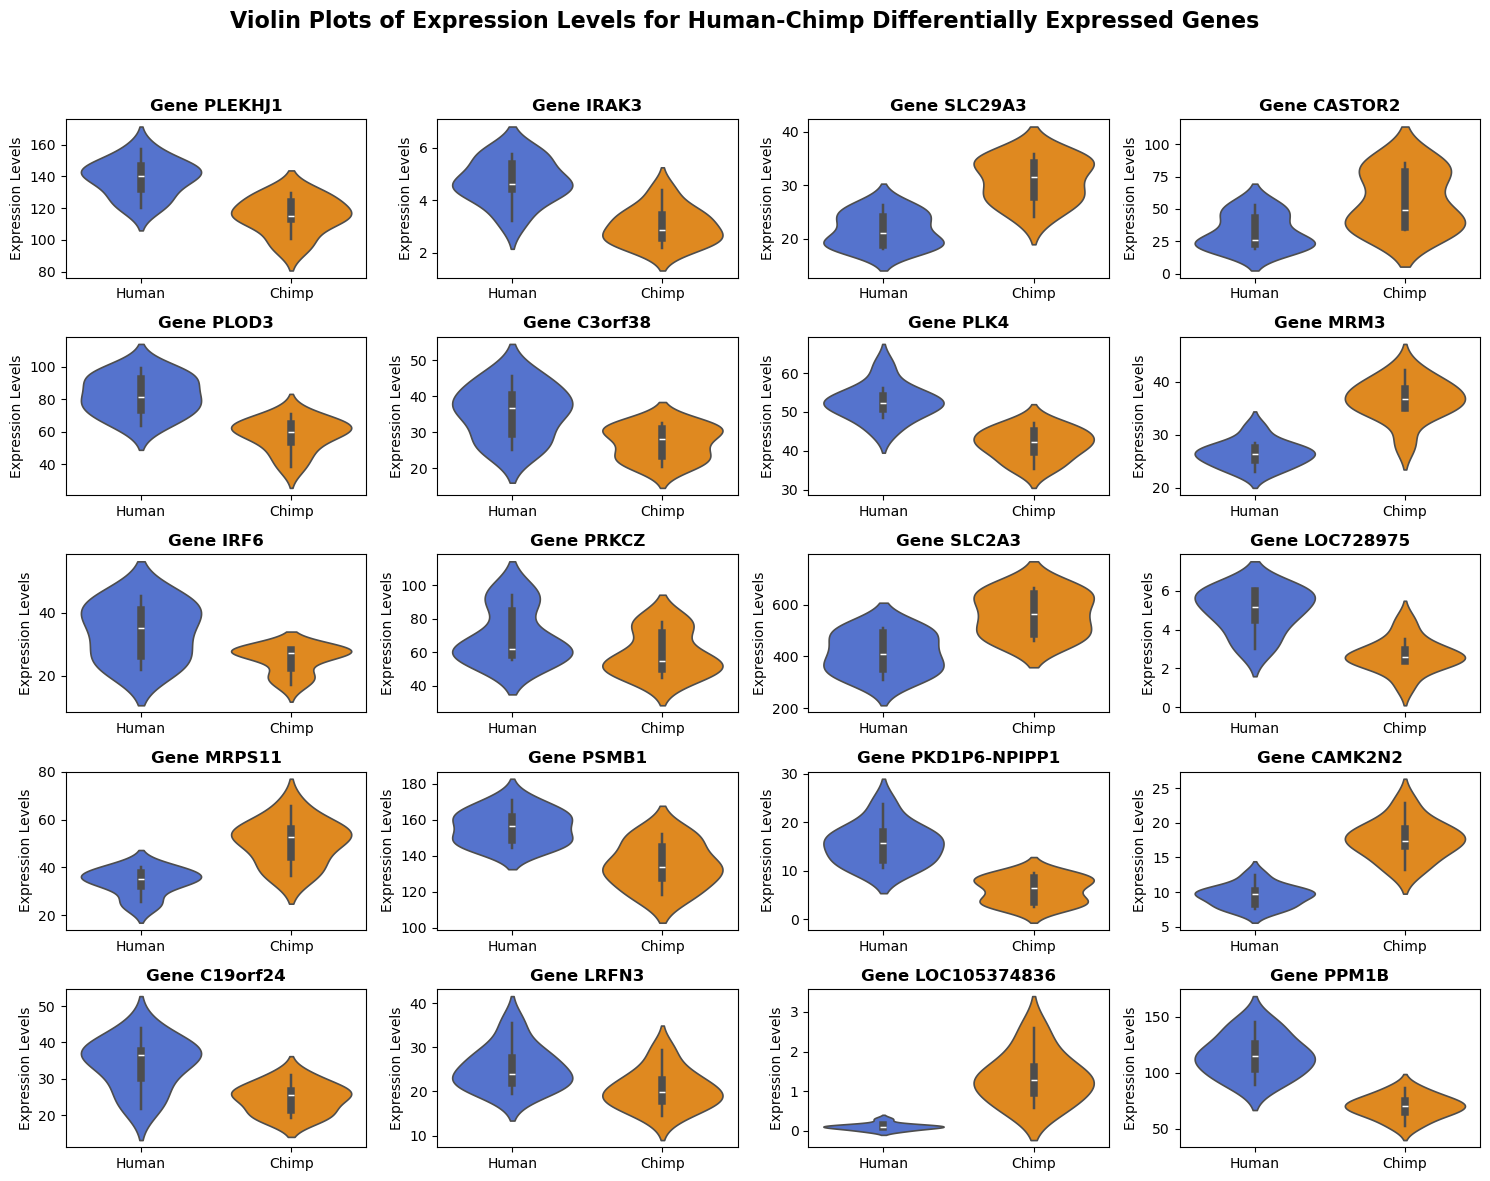

In [83]:
# Set the number of genes to display
SAMPLE_AMOUNT = 20
selected_genes_random = np.random.choice(top_120_genes, SAMPLE_AMOUNT, replace=False)

# Define colors for human and chimp expression
human_version_expression_color = HUMAN_COLOR
chimp_version_expression_color = CHIMP_COLOR

# Prepare data for violin plots
plot_data = []
for gene in selected_genes_random:
    df_human_expression = normalized_df.loc[gene, intersect([HYBRIDS_SAMPLES, REF_COUNT, IPSC])]
    df_chimp_expression = normalized_df.loc[gene, intersect([HYBRIDS_SAMPLES, ALT_COUNT, IPSC])]

    for val in df_human_expression:
        plot_data.append({'Gene': gene, 'Expression': val, 'Sample Type': 'Human'})
    for val in df_chimp_expression:
        plot_data.append({'Gene': gene, 'Expression': val, 'Sample Type': 'Chimp'})

df_plot = pd.DataFrame(plot_data)

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 12))
fig.suptitle('Violin Plots of Expression Levels for Human-Chimp Differentially Expressed Genes', fontsize=16, fontweight='bold')
axes = axes.flatten()

# Plot violin plots for each gene
for i, gene in enumerate(selected_genes_random):
    ax = axes[i]

    sns.violinplot(data=df_plot[df_plot['Gene'] == gene], x='Sample Type', y='Expression', ax=ax, 
                   palette=[human_version_expression_color, chimp_version_expression_color], inner="box", linewidth=1.2)

    ax.set_title(f'Gene {gene}', fontsize=12, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Expression Levels')

# Hide empty subplots if fewer than 20 genes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#### Calculating Log Fold Change (LFC)



Log Fold Change (**LFC**) is a commonly used metric in **gene expression analysis** to measure the relative change in expression between two conditions (e.g., Human vs. Chimpanzee). It is calculated as:

$
\text{Log}_2 \text{Fold Change} = \log_2 \left(\frac{\text{Expression in Human}}{\text{Expression in Chimp}}\right)
$

In [84]:
p_values_ref_alt_comparison_in_hybrid

LFC = pd.DataFrame(index=selected_genes, columns=['LFC'])
for gene in selected_genes: 
    refs_gene_avg = normalized_df.loc[gene, intersect([REF_COUNT, IPSC, HYBRIDS_SAMPLES])].dropna().mean()
    alts_gene_avg = normalized_df.loc[gene, intersect([ALT_COUNT, IPSC, HYBRIDS_SAMPLES])].dropna().mean()
    if (refs_gene_avg == 0 or alts_gene_avg == 0):
        LFC.loc[gene] = np.nan
    else:
        LFC.loc[gene] = np.log(refs_gene_avg / alts_gene_avg)

LFC = LFC.astype(float)
LFC.dropna(inplace=True)
selected_genes = LFC.index
p_values_ref_alt_comparison_in_hybrid = p_values_ref_alt_comparison_in_hybrid.loc[selected_genes, :].astype(float)
p_values_ref_alt_comparison_in_hybrid['LFC'] = LFC
p_values_ref_alt_comparison_in_hybrid['min_p_value'] = p_values_ref_alt_comparison_in_hybrid[
    ['fdr_p_wilcoxon_human_overexpressed', 'fdr_p_wilcoxon_human_underexpressed']].min(axis=1)


### **Creating a Volcano Plot**  

This plot is used to visualize **how confident we are** that certain genes are **differentially expressed** and **how extreme their expression differences are**.  

- The **Y-axis** represents statistical significance (**-log₁₀(p-value)**). The **higher** a gene appears on this axis, the **more confident** we are that it is differentially expressed (**lower p-value**).  
- The **X-axis** represents the **log fold change (LFC)** in gene expression between **Humans and Chimps**:
  - **Positive X values** → Overexpressed in **Humans**  
  - **Negative X values** → Overexpressed in **Chimps**  


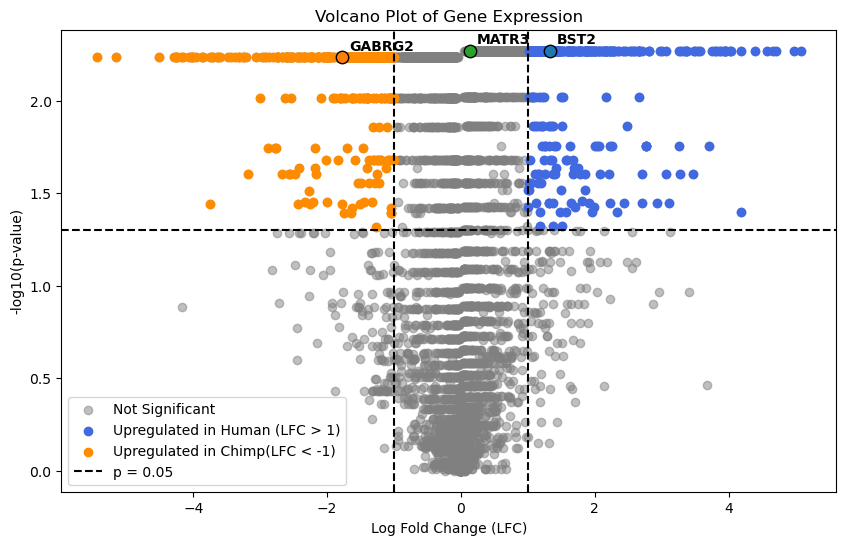

In [85]:
special_genes = ['BST2', 'GABRG2', 'MATR3']

# Define thresholds for significance
p_value_threshold = 0.05
lfc_threshold = 1.0

p_values_ref_alt_comparison_in_hybrid['-log10(p-value)'] = -np.log10(p_values_ref_alt_comparison_in_hybrid['min_p_value'])

# Define significance conditions
significant_up = (p_values_ref_alt_comparison_in_hybrid['fdr_p_wilcoxon_human_overexpressed'] < p_value_threshold) & (p_values_ref_alt_comparison_in_hybrid['LFC'] > lfc_threshold)
significant_down = (p_values_ref_alt_comparison_in_hybrid['fdr_p_wilcoxon_human_underexpressed'] < p_value_threshold) & (p_values_ref_alt_comparison_in_hybrid['LFC'] < -lfc_threshold)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(p_values_ref_alt_comparison_in_hybrid['LFC'], 
            p_values_ref_alt_comparison_in_hybrid['-log10(p-value)'], 
            color='gray', alpha=0.5, label='Not Significant')

plt.scatter(p_values_ref_alt_comparison_in_hybrid.loc[significant_up, 'LFC'], 
            p_values_ref_alt_comparison_in_hybrid.loc[significant_up, '-log10(p-value)'], 
            color=HUMAN_COLOR, label='Upregulated in Human (LFC > 1)')

plt.scatter(p_values_ref_alt_comparison_in_hybrid.loc[significant_down, 'LFC'], 
            p_values_ref_alt_comparison_in_hybrid.loc[significant_down, '-log10(p-value)'], 
            color=CHIMP_COLOR, label='Upregulated in Chimp(LFC < -1)')

# Add labels and threshold lines
plt.axhline(-np.log10(p_value_threshold), color='black', linestyle='dashed', label=f'p = {p_value_threshold}')
plt.axvline(-lfc_threshold, color='black', linestyle='dashed')
plt.axvline(lfc_threshold, color='black', linestyle='dashed')

plt.xlabel('Log Fold Change (LFC)')
plt.ylabel('-log10(p-value)')
plt.title('Volcano Plot of Gene Expression')
plt.legend()

# Highlight special genes
for gene in special_genes:
    if gene in p_values_ref_alt_comparison_in_hybrid.index:
        plt.annotate(
            gene,  # Text label
            (p_values_ref_alt_comparison_in_hybrid.loc[gene, 'LFC'],
            p_values_ref_alt_comparison_in_hybrid.loc[gene, '-log10(p-value)']),  # Position in the plot
            textcoords="offset points",
            xytext=(5,5),  # Offset for readability
            ha='left',
            fontsize=10,
            fontweight='bold'
        )
        plt.scatter(p_values_ref_alt_comparison_in_hybrid.loc[gene, 'LFC'],
                    p_values_ref_alt_comparison_in_hybrid.loc[gene, '-log10(p-value)'], 
                    edgecolors='black', s=80, label=gene)

plt.show()


## **Highlighting Key Overexpressed Genes in Humans and Chimpanzees**

After gaining a broader perspective on the overall overexpressed genes in humans and chimpanzees, we aimed to highlight a few specific genes that may shed light on key evolutionary differences between the two species.

### **Selected Genes and Their Roles**
1. **BST2** – Plays a role in the **immune system**, particularly in **virus defense**.
2. **GABRG2** – Encodes a subunit of the **GABA_A receptor**, the primary **inhibitory neurotransmitter receptor** in the brain.
3. **MATR3** – Involved in **gene expression regulation**, including **mRNA stabilization** and **splicing**.
4. **CHRNA5** – Encodes a subunit of the **nicotinic acetylcholine receptor**, which plays a role in **neurotransmission**.
5. **RYR1** – Encodes a **calcium release channel** in skeletal muscle cells, crucial for **muscle contraction**.

Each of these genes represents a distinct **evolutionary trait**, which might provide insights into species-specific adaptations.

This analysis serves as a **foundation for studying other cell types** (beyond iPSCs) and further uncovering the genetic factors that contribute to **what makes us human**.


C:\Users\wmata\AppData\Local\Temp\ipykernel_16272\309446410.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_plot, x='Sample Type', y='Expression',


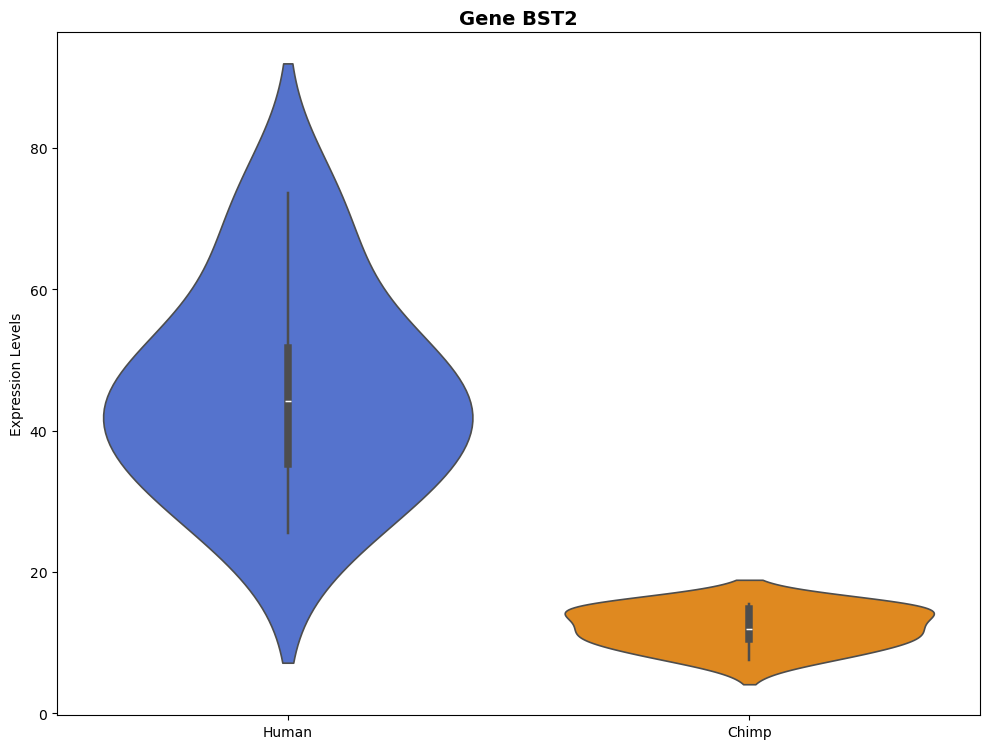

C:\Users\wmata\AppData\Local\Temp\ipykernel_16272\309446410.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_plot, x='Sample Type', y='Expression',


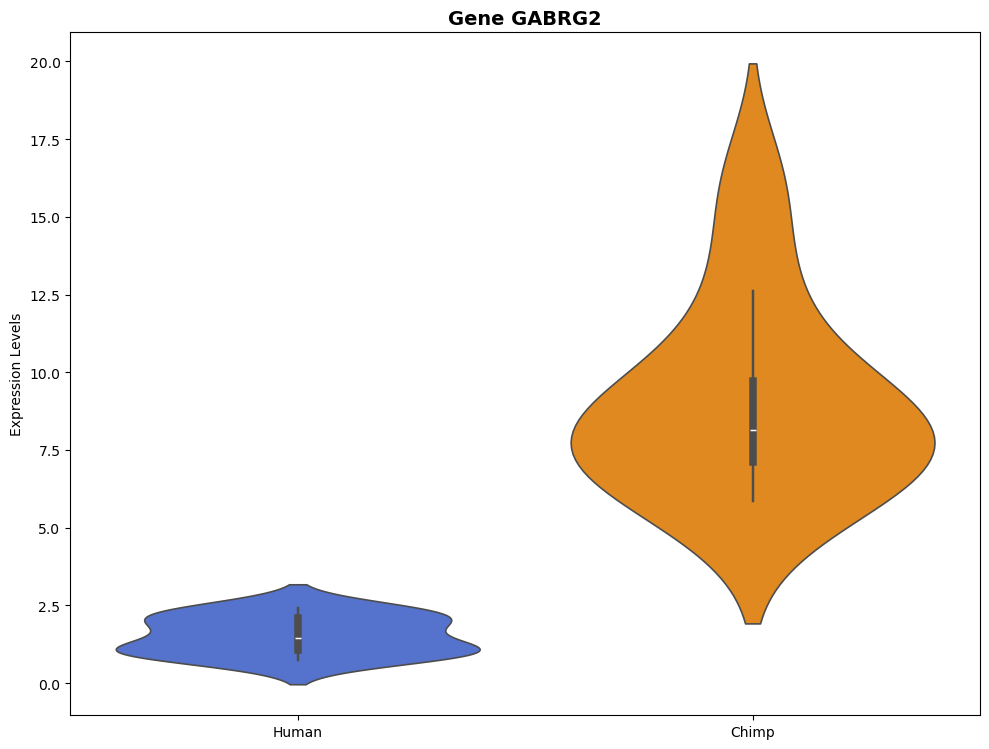

C:\Users\wmata\AppData\Local\Temp\ipykernel_16272\309446410.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_plot, x='Sample Type', y='Expression',


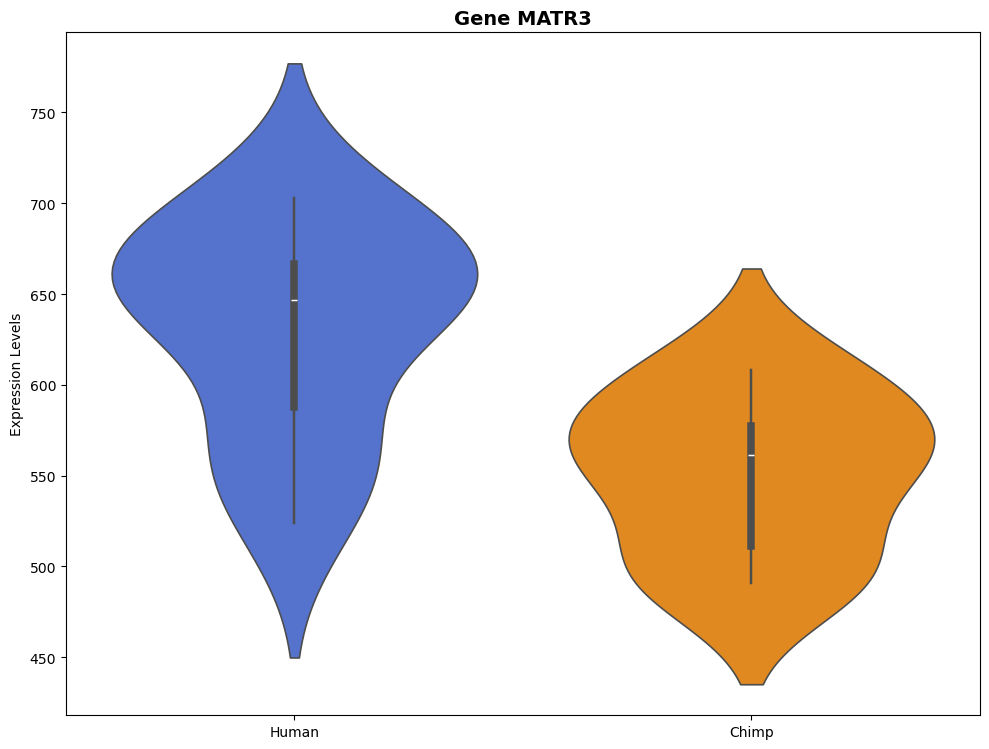

C:\Users\wmata\AppData\Local\Temp\ipykernel_16272\309446410.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_plot, x='Sample Type', y='Expression',


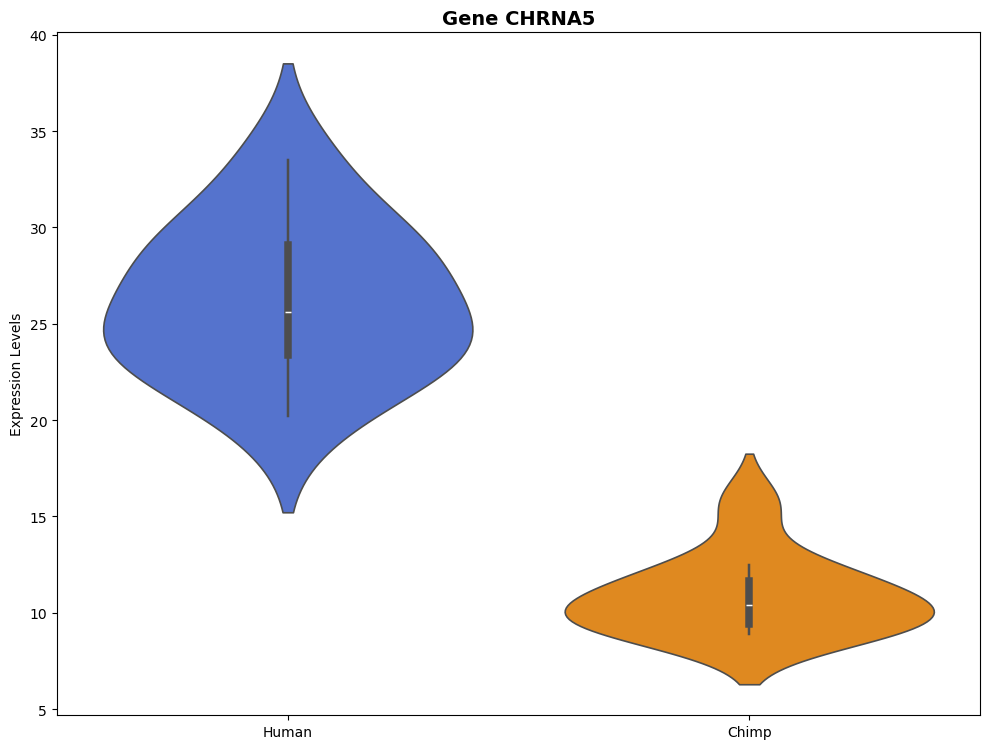

C:\Users\wmata\AppData\Local\Temp\ipykernel_16272\309446410.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_plot, x='Sample Type', y='Expression',


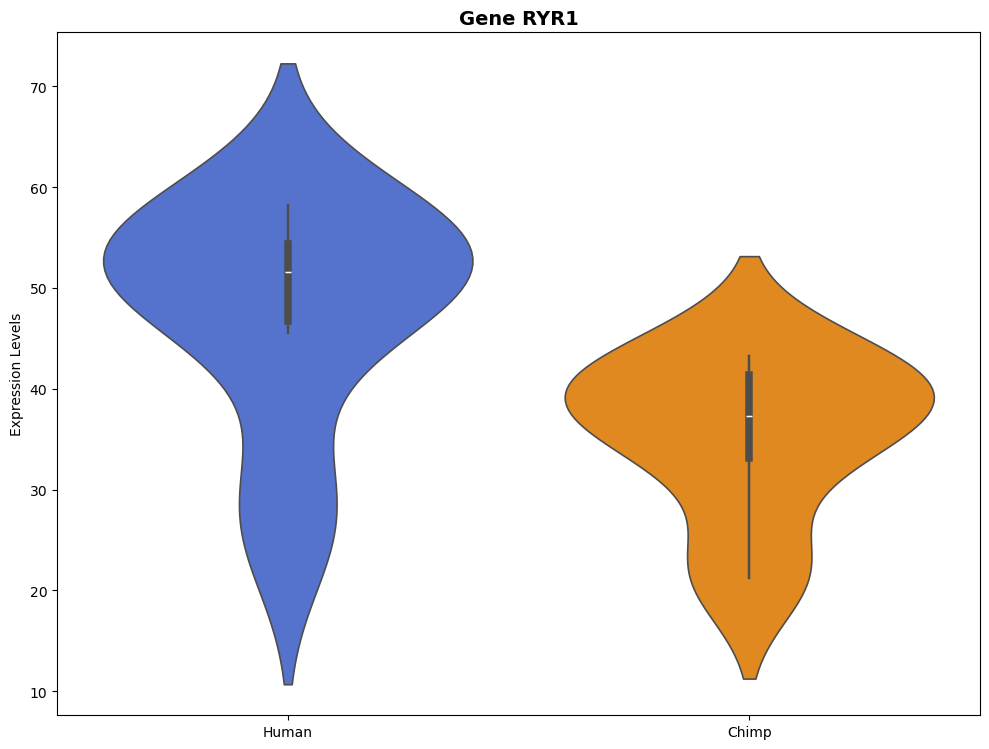

In [86]:
# List of interesting genes
interesting_genes = ['BST2', 'GABRG2', 'MATR3', 'CHRNA5', 'RYR1']

for interesting_gene in interesting_genes:
    if interesting_gene not in normalized_df.index:
        print(f"Gene {interesting_gene} not found in the dataset")
        continue

    # Extract expression values
    df_human_expression = normalized_df.loc[interesting_gene, intersect([HYBRIDS_SAMPLES, REF_COUNT, IPSC])]
    df_chimp_expression = normalized_df.loc[interesting_gene, intersect([HYBRIDS_SAMPLES, ALT_COUNT, IPSC])]

    # Drop NaNs and ensure values are numeric
    df_human_expression = df_human_expression.dropna().astype(float)
    df_chimp_expression = df_chimp_expression.dropna().astype(float)

    # Prepare DataFrame for violin plot
    plot_data = []
    for val in df_human_expression:
        plot_data.append({'Gene': interesting_gene, 'Expression': val, 'Sample Type': 'Human'})
    for val in df_chimp_expression:
        plot_data.append({'Gene': interesting_gene, 'Expression': val, 'Sample Type': 'Chimp'})

    df_plot = pd.DataFrame(plot_data)

    # Ensure Expression column is numeric
    df_plot['Expression'] = pd.to_numeric(df_plot['Expression'], errors='coerce')

    # Plot violin plot
    plt.figure(figsize=(10, 8))
    sns.violinplot(data=df_plot, x='Sample Type', y='Expression', 
                   palette=[HUMAN_COLOR, CHIMP_COLOR], inner="box", linewidth=1.2)

    plt.xlabel('')
    plt.ylabel('Expression Levels')
    plt.title(f'Gene {interesting_gene}', fontsize=14, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


Hope this was interesting :)